In [113]:
import pandas as pd

In [114]:
import numpy as np

In [115]:
import pandas_datareader.data as web

In [116]:
import datetime

In [117]:
start = datetime.datetime(2016, 1, 1)

In [118]:
end = datetime.datetime(2021, 2, 10 )

In [119]:
code_name = '^KS11'

In [120]:
#code = web.DataReader(code_name, "yahoo", start, end)  # 아래 API를 이용하는 방법

In [121]:
code = web.get_data_yahoo(code_name, start, end)    # API를 활용

In [122]:
code

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,1954.520020,1918.760010,1954.469971,1918.760010,359000.0,1918.760010
2016-01-05,1937.569946,1911.930054,1911.930054,1930.530029,446500.0,1930.530029
2016-01-06,1934.250000,1911.609985,1934.250000,1925.430054,594600.0,1925.430054
2016-01-07,1926.410034,1901.239990,1915.709961,1904.329956,393000.0,1904.329956
2016-01-08,1918.250000,1883.819946,1889.420044,1917.619995,430200.0,1917.619995
...,...,...,...,...,...,...
2021-02-04,3135.020020,3068.459961,3135.020020,3087.550049,1460900.0,3087.550049
2021-02-05,3124.620117,3081.780029,3098.489990,3120.629883,1193500.0,3120.629883
2021-02-08,3128.540039,3085.590088,3113.629883,3091.239990,1277200.0,3091.239990


In [123]:
import matplotlib.pyplot as plt

In [124]:
plt.figure(figsize = (8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

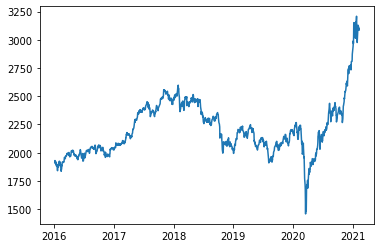

In [125]:
plt.plot(code['Close'])

In [126]:
data = code.filter(['Close']).values

In [127]:
data

array([[1918.76000977],
       [1930.5300293 ],
       [1925.43005371],
       ...,
       [3091.23999023],
       [3084.66992188],
       [3100.58007812]])

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scalar = MinMaxScaler(feature_range=(0,1))

In [130]:
scaled_data = scalar.fit_transform(data)

In [131]:
scaled_data

array([[0.26329403],
       [0.27001457],
       [0.26710255],
       ...,
       [0.93276615],
       [0.92901472],
       [0.93809923]])

In [132]:
import math

In [133]:
training_data_len = math.ceil(len(scaled_data)*0.8)

In [134]:
training_data_len  # 1248 중 80%에 해당하는 999개의 데이터 갯수 출력

999

In [135]:
# set train data

In [136]:
train_data = scaled_data[0:training_data_len]

In [137]:
x_train = []

In [138]:
y_train = []

In [139]:
PAST_SET = 10

In [140]:
for i in range(PAST_SET, len(train_data)):
    x_train.append(train_data[i-PAST_SET:i, 0])
    y_train.append(train_data[i,0])

In [141]:
x_train    

[array([0.26329403, 0.27001457, 0.26710255, 0.25505464, 0.2626431 ,
        0.24963597, 0.24736345, 0.26187799, 0.252588  , 0.24051731]),
 array([0.27001457, 0.26710255, 0.25505464, 0.2626431 , 0.24963597,
        0.24736345, 0.26187799, 0.252588  , 0.24051731, 0.24027747]),
 array([0.26710255, 0.25505464, 0.2626431 , 0.24963597, 0.24736345,
        0.26187799, 0.252588  , 0.24051731, 0.24027747, 0.24666686]),
 array([0.25505464, 0.2626431 , 0.24963597, 0.24736345, 0.26187799,
        0.252588  , 0.24051731, 0.24027747, 0.24666686, 0.22143486]),
 array([0.2626431 , 0.24963597, 0.24736345, 0.26187799, 0.252588  ,
        0.24051731, 0.24027747, 0.24666686, 0.22143486, 0.21862564]),
 array([0.24963597, 0.24736345, 0.26187799, 0.252588  , 0.24051731,
        0.24027747, 0.24666686, 0.22143486, 0.21862564, 0.24083709]),
 array([0.24736345, 0.26187799, 0.252588  , 0.24051731, 0.24027747,
        0.24666686, 0.22143486, 0.21862564, 0.24083709, 0.24883093]),
 array([0.26187799, 0.252588  , 0.

In [142]:
y_train

[0.24027746731926036,
 0.24666686043460195,
 0.22143485992495038,
 0.21862564306733534,
 0.24083709420864585,
 0.2488309276486561,
 0.23641758216788544,
 0.25136608136901095,
 0.25654491279362557,
 0.25946843879292614,
 0.26675418286075214,
 0.2563507963548487,
 0.24725499490871272,
 0.2618665609446508,
 0.2627401894701903,
 0.230622108684435,
 0.21562795552733138,
 0.23099891064781997,
 0.24590175589296737,
 0.2434121864278943,
 0.2576298041291948,
 0.2618551300304822,
 0.2619236458147972,
 0.260701722910598,
 0.2597367864731023,
 0.26318550721789047,
 0.26409342848593564,
 0.2620949701259331,
 0.279658569745897,
 0.28579669185161916,
 0.2843463597661374,
 0.2856253675404833,
 0.2789162573319034,
 0.2828160809821719,
 0.2921688688950118,
 0.2933565687574017,
 0.2938476101617761,
 0.29253430964492455,
 0.2953493116603202,
 0.30282352641053467,
 0.3051817100633657,
 0.3038341865047046,
 0.30785968051013113,
 0.3068946743719393,
 0.30167011929065046,
 0.3004368351729786,
 0.2997116691302

In [143]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [144]:
x_train

array([[0.26329403, 0.27001457, 0.26710255, ..., 0.26187799, 0.252588  ,
        0.24051731],
       [0.27001457, 0.26710255, 0.25505464, ..., 0.252588  , 0.24051731,
        0.24027747],
       [0.26710255, 0.25505464, 0.2626431 , ..., 0.24051731, 0.24027747,
        0.24666686],
       ...,
       [0.46227767, 0.45021833, 0.4105861 , ..., 0.39984006, 0.40425379,
        0.43983209],
       [0.45021833, 0.4105861 , 0.41547379, ..., 0.40425379, 0.43983209,
        0.430702  ],
       [0.4105861 , 0.41547379, 0.39418734, ..., 0.43983209, 0.430702  ,
        0.42448972]])

In [145]:
y_train

array([0.24027747, 0.24666686, 0.22143486, 0.21862564, 0.24083709,
       0.24883093, 0.23641758, 0.25136608, 0.25654491, 0.25946844,
       0.26675418, 0.2563508 , 0.24725499, 0.26186656, 0.26274019,
       0.23062211, 0.21562796, 0.23099891, 0.24590176, 0.24341219,
       0.2576298 , 0.26185513, 0.26192365, 0.26070172, 0.25973679,
       0.26318551, 0.26409343, 0.26209497, 0.27965857, 0.28579669,
       0.28434636, 0.28562537, 0.27891626, 0.28281608, 0.29216887,
       0.29335657, 0.29384761, 0.29253431, 0.29534931, 0.30282353,
       0.30518171, 0.30383419, 0.30785968, 0.30689467, 0.30167012,
       0.30043684, 0.29971167, 0.30677479, 0.31090302, 0.30731148,
       0.29458985, 0.2976732 , 0.28840608, 0.29330513, 0.29477261,
       0.29372201, 0.29276272, 0.29901501, 0.31877697, 0.31808031,
       0.31487708, 0.31616752, 0.31300993, 0.32229992, 0.3185257 ,
       0.317989  , 0.3208896 , 0.31847433, 0.31021215, 0.30634083,
       0.29720502, 0.30192139, 0.29638276, 0.29130103, 0.29968

In [146]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [147]:
x_train

array([[[0.26329403],
        [0.27001457],
        [0.26710255],
        ...,
        [0.26187799],
        [0.252588  ],
        [0.24051731]],

       [[0.27001457],
        [0.26710255],
        [0.25505464],
        ...,
        [0.252588  ],
        [0.24051731],
        [0.24027747]],

       [[0.26710255],
        [0.25505464],
        [0.2626431 ],
        ...,
        [0.24051731],
        [0.24027747],
        [0.24666686]],

       ...,

       [[0.46227767],
        [0.45021833],
        [0.4105861 ],
        ...,
        [0.39984006],
        [0.40425379],
        [0.43983209]],

       [[0.45021833],
        [0.4105861 ],
        [0.41547379],
        ...,
        [0.40425379],
        [0.43983209],
        [0.430702  ]],

       [[0.4105861 ],
        [0.41547379],
        [0.39418734],
        ...,
        [0.43983209],
        [0.430702  ],
        [0.42448972]]])

In [148]:
from tensorflow.keras.models import Sequential

In [149]:
from tensorflow.keras.layers import Dense, LSTM

In [150]:
from tensorflow import keras

In [151]:
model = Sequential()

In [152]:
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

In [153]:
model.add(LSTM(50, return_sequences=False))

In [154]:
model.add(Dense(25))

In [155]:
model.add(Dense(1))

In [156]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [159]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.fit(x_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
198/198 [==============================] - 2s 8ms/step - loss: 1.4376e-04
Epoch 2/100
198/198 [==============================] - 1s 7ms/step - loss: 1.2233e-04
Epoch 3/100
198/198 [==============================] - 1s 7ms/step - loss: 1.3374e-04
Epoch 4/100
198/198 [==============================] - 1s 7ms/step - loss: 1.3332e-04
Epoch 5/100
198/198 [==============================] - 2s 8ms/step - loss: 1.3167e-04
Epoch 6/100
198/198 [==============================] - 2s 8ms/step - loss: 1.4163e-04
Epoch 7/100
198/198 [==============================] - 2s 8ms/step - loss: 1.1438e-04
Epoch 8/100
198/198 [==============================] - 2s 8ms/step - loss: 1.4150e-04
Epoch 9/100
198/198 [==============================] - 1s 7ms/step - loss: 1.1583e-04
Epoch 10/100
198/198 [==============================] - 1s 7ms/step - loss: 1.2613e-04
Epoch 11/100
198/198 [==============================] - 2s 8ms/step - loss: 1.3535e-04
Epoch 12/100
198/198 [==============================

198/198 [==============================] - 2s 8ms/step - loss: 1.0757e-04
Epoch 95/100
198/198 [==============================] - 2s 9ms/step - loss: 1.2023e-04
Epoch 96/100
198/198 [==============================] - 2s 9ms/step - loss: 1.1549e-04
Epoch 97/100
198/198 [==============================] - 2s 8ms/step - loss: 1.1069e-04
Epoch 98/100
198/198 [==============================] - 2s 8ms/step - loss: 1.1851e-04
Epoch 99/100
198/198 [==============================] - 1s 7ms/step - loss: 1.2328e-04
Epoch 100/100
198/198 [==============================] - 1s 7ms/step - loss: 1.2377e-04


In [161]:
# Training 시간 소요

In [162]:
test_data = scaled_data[training_data_len - PAST_SET:,:]

In [163]:
x_test = []

In [164]:
y_test = data[training_data_len:,:]

In [165]:
for i in range(PAST_SET, len(test_data)):
    x_test.append(test_data[i-PAST_SET:i, 0])

In [171]:
x_test = np.array(x_test)

In [175]:
np.shape(x_test)      # LSTM의 Input 구조를 확인

(249, 10, 1)

In [177]:
x_test

array([[[0.41547379],
        [0.39418734],
        [0.3776344 ],
        ...,
        [0.430702  ],
        [0.42448972],
        [0.43708003]],

       [[0.39418734],
        [0.3776344 ],
        [0.3775601 ],
        ...,
        [0.42448972],
        [0.43708003],
        [0.44579318]],

       [[0.3776344 ],
        [0.3775601 ],
        [0.39984006],
        ...,
        [0.43708003],
        [0.44579318],
        [0.44269847]],

       ...,

       [[1.        ],
        [0.96078458],
        [0.95064954],
        ...,
        [0.9547149 ],
        [0.93065924],
        [0.94954743]],

       [[0.96078458],
        [0.95064954],
        [0.92009596],
        ...,
        [0.93065924],
        [0.94954743],
        [0.93276615]],

       [[0.95064954],
        [0.92009596],
        [0.86708537],
        ...,
        [0.94954743],
        [0.93276615],
        [0.92901472]]])

In [178]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [230]:
predictions = model.predict(x_test)

In [231]:
predictions

array([[0.432468  ],
       [0.44391415],
       [0.44260702],
       [0.4469079 ],
       [0.44662878],
       [0.42747092],
       [0.42508674],
       [0.4190252 ],
       [0.40131873],
       [0.35331857],
       [0.36270326],
       [0.35472345],
       [0.3434344 ],
       [0.30492207],
       [0.31033936],
       [0.3198771 ],
       [0.3475405 ],
       [0.3639997 ],
       [0.3376179 ],
       [0.28421757],
       [0.2839838 ],
       [0.25791916],
       [0.21929878],
       [0.18521768],
       [0.15582632],
       [0.13464364],
       [0.09275201],
       [0.02682285],
       [0.08561828],
       [0.02684907],
       [0.11126567],
       [0.14172031],
       [0.14286044],
       [0.15908836],
       [0.15525687],
       [0.17640169],
       [0.13756551],
       [0.16184364],
       [0.15778981],
       [0.19778092],
       [0.2137284 ],
       [0.20681298],
       [0.22106981],
       [0.2332812 ],
       [0.21509677],
       [0.23143327],
       [0.2310527 ],
       [0.264

In [268]:
predictions = scalar.inverse_transform(predictions)

In [269]:
predictions

array([[2215.043 ],
       [2235.089 ],
       [2232.7998],
       [2240.3323],
       [2239.8433],
       [2206.291 ],
       [2202.1155],
       [2191.5   ],
       [2160.4895],
       [2076.4243],
       [2092.8604],
       [2078.8848],
       [2059.1138],
       [1991.6653],
       [2001.153 ],
       [2017.8568],
       [2066.305 ],
       [2095.1309],
       [2048.9272],
       [1955.4044],
       [1954.995 ],
       [1909.3467],
       [1841.709 ],
       [1782.021 ],
       [1730.5465],
       [1693.4481],
       [1620.0812],
       [1504.6162],
       [1607.5875],
       [1504.6621],
       [1652.5051],
       [1705.8419],
       [1707.8386],
       [1736.2594],
       [1729.5492],
       [1766.581 ],
       [1698.5653],
       [1741.085 ],
       [1733.9852],
       [1804.0237],
       [1831.9532],
       [1819.8418],
       [1844.8105],
       [1866.197 ],
       [1834.3497],
       [1862.9606],
       [1862.2942],
       [1920.191 ],
       [1906.034 ],
       [1887.005 ],


In [270]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [271]:
rmse

9.836641487826306

In [272]:
data = code.filter(['Close'])

In [273]:
data

,Close
Date,
2016-01-04,1918.760010
2016-01-05,1930.530029
2016-01-06,1925.430054
2016-01-07,1904.329956
2016-01-08,1917.619995
...,...
2021-02-04,3087.550049
2021-02-05,3120.629883
2021-02-08,3091.239990


In [274]:
train = data[:training_data_len]

In [275]:
train

,Close
Date,
2016-01-04,1918.760010
2016-01-05,1930.530029
2016-01-06,1925.430054
2016-01-07,1904.329956
2016-01-08,1917.619995
...,...
2020-02-05,2165.629883
2020-02-06,2227.939941
2020-02-07,2211.949951


In [276]:
valid = data[training_data_len:]

In [277]:
type(valid)

pandas.core.frame.DataFrame

In [278]:
type(predictions)

numpy.ndarray

In [279]:
valid

,Close
Date,
2020-02-12,2238.379883
2020-02-13,2232.959961
2020-02-14,2243.590088
2020-02-17,2242.169922
2020-02-18,2208.879883
...,...
2021-02-04,3087.550049
2021-02-05,3120.629883
2021-02-08,3091.239990


In [281]:
valid.loc[:,'Predictions'] = predictions     

In [282]:
valid

,Close,Predictions
Date,,
2020-02-12,2238.379883,2215.042969
2020-02-13,2232.959961,2235.089111
2020-02-14,2243.590088,2232.799805
2020-02-17,2242.169922,2240.332275
2020-02-18,2208.879883,2239.843262
...,...,...
2021-02-04,3087.550049,3104.179932
2021-02-05,3120.629883,3062.878418
2021-02-08,3091.239990,3059.990234


In [283]:
plt.figure(figsize = (8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

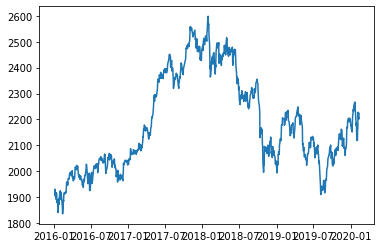

In [284]:
plt.plot(train['Close'])

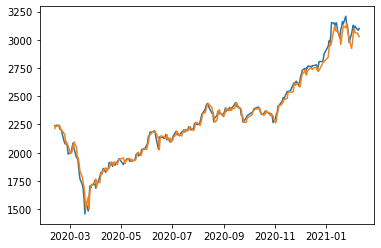

In [285]:
plt.plot(valid[['Close', 'Predictions']])

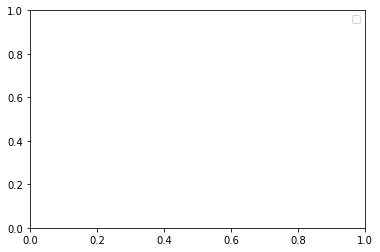

In [286]:
plt.legend(['Train', 'Val', 'Predictions'])

In [287]:
plt.show()